<a href="https://www.kaggle.com/code/tamaturgo/an-lise-pa-ses-cluesteriza-o-top-especiais-i?scriptVersionId=131262657" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [778]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans,DBSCAN, AffinityPropagation, MeanShift, estimate_bandwidth, Birch
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

# Carregando a base de dados

In [779]:
df = pd.read_csv("/kaggle/input/unsupervised-learning-on-country-data/Country-data.csv")
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [780]:
labels = df['country']
df = df.drop("country", axis = 1)
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


## Coorelação entre os dados

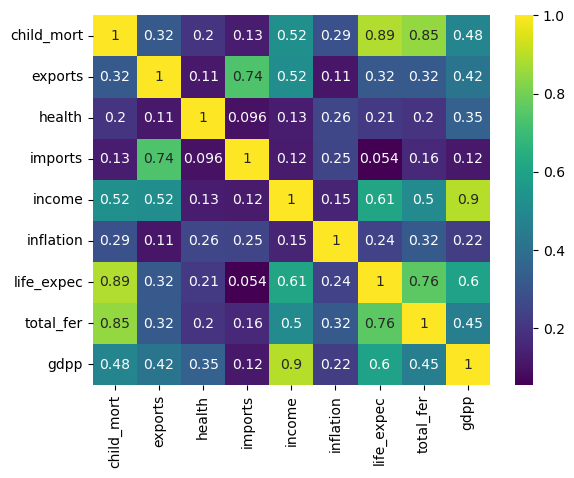

In [781]:
# Calculando a matriz de correlação
correlation_matrix = df.corr(method='pearson')
correlation_matrix = correlation_matrix.abs()
# Plotando a matriz de correlação usando seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="viridis")
# Exibindo o gráfico
plt.show()

In [782]:
# Group 1
pib_p = df["gdpp"]
income = df["income"]
# Group 2
child_m = df["child_mort"]
life_e = df["life_expec"]
total_fer = df["total_fer"]

In [783]:
# Unificando PIB per capita + Renda líquida per capita
pib_sum_income = []
for i in range(len(pib_p)):
    n = pib_p.iloc[i] + income.iloc[i]
    pib_sum_income.append(n)

df['income_gdpp'] = pib_sum_income
df = df.drop(['income','gdpp'], axis=1)


In [784]:
# Unificando Child_mort, Life_expec (Média Harmônica - Inversamente proporcional)
child_m_and_life_e = []
for i in range(len(pib_p)):
    harmonic_avg = 3 / ((1 / child_m.iloc[i]) + (1 / life_e.iloc[i]) + (1/ total_fer.iloc[i]))  
    child_m_and_life_e.append(harmonic_avg)

df['child_m_life_e_fer'] = child_m_and_life_e
df = df.drop(['child_mort','life_expec', 'total_fer'], axis=1)


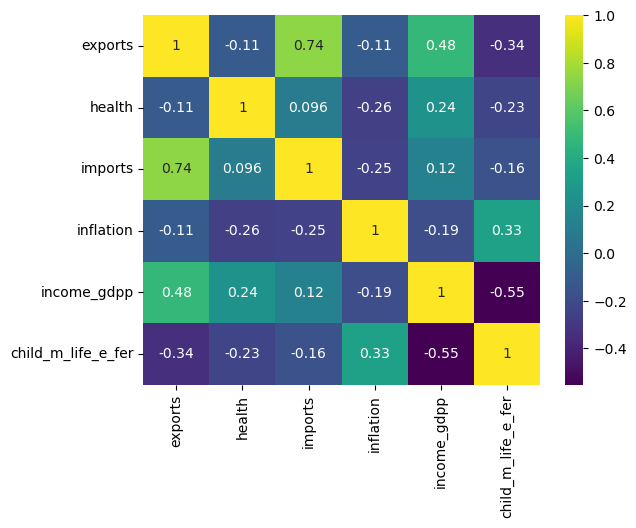

In [785]:
# Calculando a matriz de correlação
correlation_matrix = df.corr(method='pearson')
correlation_matrix = correlation_matrix
# Plotando a matriz de correlação usando seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="viridis")
# Exibindo o gráfico
plt.show()


In [786]:
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


# Clusterização

## Kmeans (4 k)

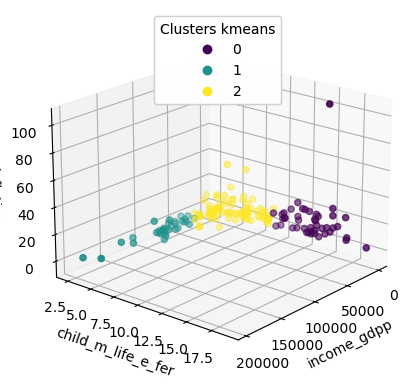

In [787]:
# Definir o número de clusters desejado
n_clusters = 3

# Inicializar o modelo de clusterização (k-means)
kmeans = KMeans(n_clusters=n_clusters, n_init='auto')

# Realizar a clusterização
kmeans.fit(df_norm)

# Definir as coordenadas x, y, z
x = df['income_gdpp']
y = df['child_m_life_e_fer']
z = df['inflation']

# Definir os rótulos dos clusters
clusters = kmeans.labels_

# Criar a figura e o objeto de eixos 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotar os pontos 3D com cores diferentes para cada cluster
scatter = ax.scatter(x, y, z, c=clusters, cmap='viridis')

# Adicionar legenda
legend1 = ax.legend(*scatter.legend_elements(), title='Clusters kmeans', loc=9)
ax.add_artist(legend1)

# Rotacionar o gráfico 3D
ax.view_init(elev=20, azim=40)

# Definir rótulos dos eixos
ax.set_xlabel('income_gdpp')
ax.set_ylabel('child_m_life_e_fer')
ax.set_zlabel('inflation')

# Exibir o plot 3D
plt.show()

In [788]:
an_kmeans = [] 
for i in range(n_clusters):
        for j in range(len(labels)):
            if clusters[j] == i:
                an_kmeans.append({"Country": labels[j], "Cluster": clusters[j]})
                
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df_norm, clusters))

Silhouette Coefficient: 0.319


## Dbscan

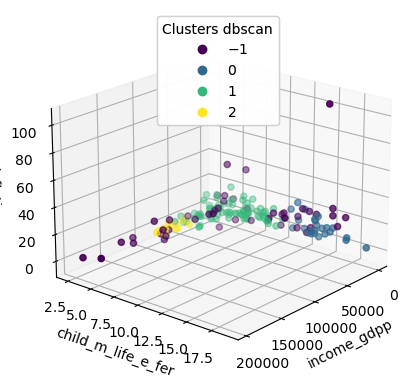

In [789]:
# Inicializar o modelo de clusterização (dbscan)
dbscan = DBSCAN(eps=0.15, min_samples=4)

# Realizar a clusterização
dbscan.fit(df_norm)

# Definir as coordenadas x, y, z
x = df['income_gdpp']
y = df['child_m_life_e_fer']
z = df['inflation']

# Definir os rótulos dos clusters
clusters = dbscan.labels_
# Criar a figura e o objeto de eixos 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotar os pontos 3D com cores diferentes para cada cluster
scatter = ax.scatter(x, y, z, c=clusters, cmap='viridis')

# Adicionar legenda
legend1 = ax.legend(*scatter.legend_elements(), title='Clusters dbscan', loc=9)
ax.add_artist(legend1)

# Rotacionar o gráfico 3D
ax.view_init(elev=20, azim=40)

# Definir rótulos dos eixos
ax.set_xlabel('income_gdpp')
ax.set_ylabel('child_m_life_e_fer')
ax.set_zlabel('inflation')
# Exibir o plot 3D
plt.show()

In [790]:
an_dbscan = [] 
n_clusters =  len(np.unique(clusters))
for i in range(-1, n_clusters):
        for j in range(len(labels)):
            if clusters[j] == i:
                an_dbscan.append({"Country": labels[j], "Cluster": clusters[j]})
                
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df_norm, clusters))

Silhouette Coefficient: 0.163


## MeanShift

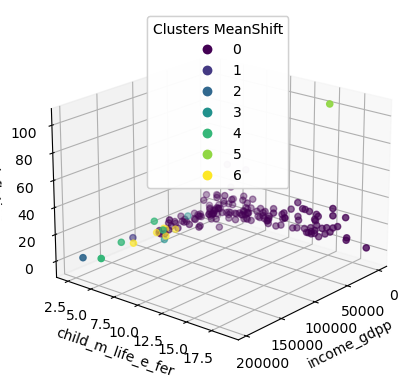

In [791]:
# Inicializar o modelo de clusterização (MeanShift)
bw = estimate_bandwidth(df_norm, quantile=0.25)
ms = MeanShift(bandwidth=bw, bin_seeding=False)

# Realizar a clusterização
ms.fit(df_norm)
# Definir as coordenadas x, y, z
x = df['income_gdpp']
y = df['child_m_life_e_fer']
z = df['inflation']

# Definir os rótulos dos clusters
clusters = ms.labels_

# Criar a figura e o objeto de eixos 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotar os pontos 3D com cores diferentes para cada cluster
scatter = ax.scatter(x, y, z, c=clusters, cmap='viridis')

# Adicionar legenda
legend1 = ax.legend(*scatter.legend_elements(), title='Clusters MeanShift', loc=9)
ax.add_artist(legend1)

# Rotacionar o gráfico 3D
ax.view_init(elev=20, azim=40)

# Definir rótulos dos eixos
ax.set_xlabel('income_gdpp')
ax.set_ylabel('child_m_life_e_fer')
ax.set_zlabel('inflation')
# Exibir o plot 3D
plt.show()

In [792]:
an_meanshift = [] 
n_clusters =  len(np.unique(clusters))
for i in range(-1, n_clusters):
        for j in range(len(labels)):
            if clusters[j] == i:
                an_meanshift.append({"Country": labels[j], "Cluster": clusters[j]})
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df_norm, clusters))

Silhouette Coefficient: 0.243


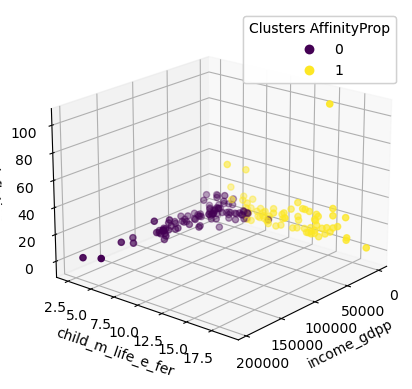

In [793]:
af = AffinityPropagation(preference=-4)
# Realizar a clusterização
af.fit(df_norm)

# Definir as coordenadas x, y, z
x = df['income_gdpp']
y = df['child_m_life_e_fer']
z = df['inflation']

# Definir os rótulos dos clusters
clusters = af.labels_

# Criar a figura e o objeto de eixos 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotar os pontos 3D com cores diferentes para cada cluster
scatter = ax.scatter(x, y, z, c=clusters, cmap='viridis')

# Adicionar legenda
legend1 = ax.legend(*scatter.legend_elements(), title='Clusters AffinityProp', loc=0)
ax.add_artist(legend1)

# Rotacionar o gráfico 3D
ax.view_init(elev=20, azim=40)

# Definir rótulos dos eixos
ax.set_xlabel('income_gdpp')
ax.set_ylabel('child_m_life_e_fer')
ax.set_zlabel('inflation')
# Exibir o plot 3D
plt.show()

In [794]:
an_affp = [] 
n_clusters =  len(np.unique(clusters))
for i in range(-1, n_clusters):
        for j in range(len(labels)):
            if clusters[j] == i:
                an_affp.append({"Country": labels[j], "Cluster": clusters[j]})

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df_norm, clusters))

Silhouette Coefficient: 0.298


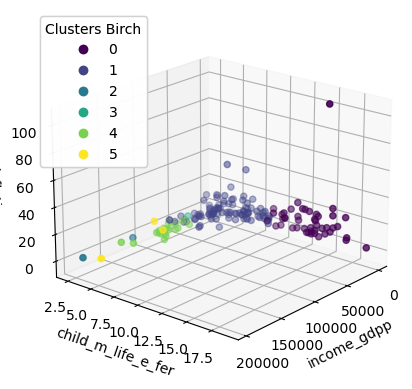

In [795]:
birch = Birch(threshold=0.3, n_clusters=None)
# Realizar a clusterização
birch.fit(df_norm)

# Definir as coordenadas x, y, z
x = df['income_gdpp']
y = df['child_m_life_e_fer']
z = df['inflation']

# Definir os rótulos dos clusters
clusters = birch.labels_

# Criar a figura e o objeto de eixos 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotar os pontos 3D com cores diferentes para cada cluster
scatter = ax.scatter(x, y, z, c=clusters, cmap='viridis')

# Adicionar legenda
legend1 = ax.legend(*scatter.legend_elements(), title='Clusters Birch', loc=0)
ax.add_artist(legend1)

# Rotacionar o gráfico 3D
ax.view_init(elev=20, azim=40)

# Definir rótulos dos eixos
ax.set_xlabel('income_gdpp')
ax.set_ylabel('child_m_life_e_fer')
ax.set_zlabel('inflation')
# Exibir o plot 3D
plt.show()

In [796]:
an_birch = [] 
n_clusters =  len(np.unique(clusters))
for i in range(n_clusters):
        for j in range(len(labels)):
            if clusters[j] == i:
                an_birch.append({"Country": labels[j], "Cluster": clusters[j]})
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df_norm, clusters))

Silhouette Coefficient: 0.326


# Analisando os resultados

## Análise Final dos Clusters

Para a análise final, foram selecionados os clusters com melhor Silhouette Coefficient. O Silhouette Coefficient é uma métrica que avalia a qualidade dos clusters, levando em consideração tanto a coesão interna dos pontos em um cluster quanto a separação entre os diferentes clusters.

Após a aplicação dos algoritmos de clusterização, dois métodos se destacaram: K-means e Birch. O algoritmo K-means foi executado com k=3, resultando em três clusters distintos. Já o algoritmo Birch foi executado com um threshold de 0.3 , gerando seis clusters no total.

Esses clusters selecionados apresentaram um desempenho superior em termos de qualidade, conforme avaliado pelo Silhouette Coefficient. Eles demonstraram uma boa separação entre os clusters e uma coesão interna dos pontos, indicando uma representatividade consistente.

A análise desses clusters selecionados nos permite compreender melhor a estrutura e a distribuição dos dados, bem como identificar grupos específicos com comportamentos ou características semelhantes.


## Análise Kmean (Sillhouette Coef.: 0.319)

In [797]:
# Identificar os países de cada cluster (KMeans)
kclusters0 = []
kclusters1 = []
kclusters2 = []
for item in an_kmeans:
    if item["Cluster"] == 0:
        kclusters0.append(item["Country"])
    elif item["Cluster"] == 1:
        kclusters1.append(item["Country"])
    elif item["Cluster"] == 2:
        kclusters2.append(item["Country"])

In [798]:
# Resultado da Análise de Clusterização

print(" ## Resultado da Análise de Clusterização ## ")
print(" ## KMeans ## ")
print ("\nCluster 0 - Resultados")
print("Países do Cluster 0 tendem a ter um problema com a Renda per Capita e o PIB")
print("Países do Cluster 0 não tendem a ter problemas com a Taxa de Mortalidade Infantil, Expectativa de Vida e taxa de fertilidade das mulheres")
print("Países do Cluster 0 também podem ter problemas com inflação")
print("\nCluster 0 - Países com economia instável mas com bons indicadores sociais")
print(kclusters0)
print("\n_________________________________________")
print ("\nCluster 1 - Resultados")
print("Países do Cluster 1 não tendem a ter problemas com a Renda per Capita e o PIB")
print("Países do Cluster 1 não tendem a ter problemas com a Taxa de Mortalidade Infantil, Expectativa de Vida e taxa de fertilidade das mulheres")
print("Países do Cluster 1 não tendem a ter problemas com inflação")
print("\nCluster 1 - Países com economia estável e bons indicadores sociais")
print(kclusters1)
print("\n_________________________________________")
print("Cluster 2 - Resultados")
print("Países do Cluster 2 tendem a ter um problema com a Taxa de Mortalidade Infantil, Expectativa de Vida e taxa de fertilidade das mulheres")
print("Países do Cluster 2 também tendem a ter um problema com a Renda per Capita e o PIB")
print("Países do Cluster 2 também podem ter problemas com inflação")
print("\nCluster 2 - Países com problemas socioeconômicos")
print(kclusters2)

 ## Resultado da Análise de Clusterização ## 
 ## KMeans ## 

Cluster 0 - Resultados
Países do Cluster 0 tendem a ter um problema com a Renda per Capita e o PIB
Países do Cluster 0 não tendem a ter problemas com a Taxa de Mortalidade Infantil, Expectativa de Vida e taxa de fertilidade das mulheres
Países do Cluster 0 também podem ter problemas com inflação

Cluster 0 - Países com economia instável mas com bons indicadores sociais
['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Iraq', 'Kenya', 'Kiribati', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Samoa', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia']

___________________________________

## Análise Birch (Sillhouette Coef.: 326)

In [799]:
# Identificar os países de cada cluster (birch)
cluster0 = []
clusters1 = []
clusters2 = []
clusters3 = []
clusters4 = []
clusters5 = []
for item in an_birch:
    if item["Cluster"] == 0:
        cluster0.append(item["Country"])
    elif item["Cluster"] == 1:
        clusters1.append(item["Country"])
    elif item["Cluster"] == 2:
        clusters2.append(item["Country"])
    elif item["Cluster"] == 3:
        clusters3.append(item["Country"])
    elif item["Cluster"] == 4:
        clusters4.append(item["Country"])
    elif item["Cluster"] == 5:
        clusters5.append(item["Country"])


In [800]:
# Resultado da Análise de Clusterização
print(" ## Resultado da Análise de Clusterização ## ")
print(" ## Birch ## ")
print("Cluster 0 - Resultados")
print("Países do Cluster 0 tendem a ter um problema com a Taxa de Mortalidade Infantil, Expectativa de Vida e taxa de fertilidade das mulheres")
print("Países do Cluster 0 também tendem a ter um problema com a Renda per Capita e o PIB")
print("Países do Cluster 0 também podem ter problemas com inflação")
print("\nCluster 0 - Países com problemas econômicos e péssimos indicadores sociais")
print(cluster0)
print ("\nCluster 1 - Resultados")
print("Países do Cluster 1 tendem a ter um problema com a Renda per Capita e o PIB")
print("Países do Cluster 1 não tendem a ter problemas com a Taxa de Mortalidade Infantil, Expectativa de Vida e taxa de fertilidade das mulheres")
print("Países do Cluster 1 também podem ter problemas com inflação")
print("\nCluster 1 - Países com economia instável mas com bons indicadores sociais")
print(clusters1)
print("\n_________________________________________")
# Cluster 2 ótima renda per capita e PIB, sem problemas com inflação e bons indicadores sociais
print ("\nCluster 2 - Resultados")
print("Países do Cluster 2 não tendem a ter problemas com a Renda per Capita e o PIB")
print("Países do Cluster 2 não tendem a ter problemas com a Taxa de Mortalidade Infantil, Expectativa de Vida e taxa de fertilidade das mulheres")
print("Países do Cluster 2 não tendem a ter problemas com inflação")
print("\nCluster 2 - Países com economia estável e bons indicadores sociais")
print(clusters2)
print("\n_________________________________________")
# Cluster 3, 4 e 5 ótima renda per capita e PIB, poucos problemas com inflação e bons indicadores sociais
print ("\nClusters 3, 4 e 5 - Resultados")
print("Países do Cluster 3, 4 e  5 não tendem a ter problemas com a Renda per Capita e o PIB")
print("Países do Cluster 3, 4 e  5 não tendem a ter problemas com a Taxa de Mortalidade Infantil, Expectativa de Vida e taxa de fertilidade das mulheres")
print("Países do Cluster 3, 4 e  5 tendem a ter poucos problemas com inflação")
print("\nCluster 3 - Países com economia estável e bons indicadores sociais")
print(clusters3)
print(clusters4)
print(clusters5)

 ## Resultado da Análise de Clusterização ## 
 ## Birch ## 
Cluster 0 - Resultados
Países do Cluster 0 tendem a ter um problema com a Taxa de Mortalidade Infantil, Expectativa de Vida e taxa de fertilidade das mulheres
Países do Cluster 0 também tendem a ter um problema com a Renda per Capita e o PIB
Países do Cluster 0 também podem ter problemas com inflação

Cluster 0 - Países com problemas econômicos e péssimos indicadores sociais
['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Iraq', 'Kenya', 'Kiribati', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Samoa', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Tonga', 'Uganda', 'Yemen', 'Zambia']

Cluster 